<a href="https://colab.research.google.com/github/phuocnguyen2201/data-analysis-topic/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is group "Helsinki".

This is the topic that we choose: https://www.kaggle.com/datasets/ultimus/football-wages-prediction/

Dataset contains data for 3900 players in the top 6 leagues.

# Import all nessescery tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode


df = pd.read_csv('https://raw.githubusercontent.com/phuocnguyen2201/data-analysis-topic/main/SalaryPrediction.csv')

#The Wage column is an object so we convert to float.
df['Wage'] = df['Wage'].apply(lambda x: float(x.replace(',', '')));
pd.options.display.float_format = '{:,.2f}'.format

# A sneak peak about the database.
df.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000.00",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000.00",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000.00",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000.00",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000.00",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


# General view

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Wage      3907 non-null   float64
 1   Age       3907 non-null   int64  
 2   Club      3907 non-null   object 
 3   League    3907 non-null   object 
 4   Nation    3907 non-null   object 
 5   Position  3907 non-null   object 
 6   Apps      3907 non-null   int64  
 7   Caps      3907 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 244.3+ KB


Phewww, beautiful number. We have 8 columns, all filled with 3907 rows of data.

In [ ]:
df.shape

NameError: ignored

In [ ]:
df['Wage'].dtype

dtype('float64')

# Nominal Attributes

All columns below are nominal because they are categorical and classify the players.

*For example: *

**Club**: PSG, Chelsea etc.

**Nation**: ENG, ITA

In [ ]:
print(df[["Club","League", "Nation","Position"]].describe())

        Club          League Nation  Position
count   3907            3907   3907      3907
unique   116               6    114         4
top      MRT  Premier League    ESP  Defender
freq      64             875    452      1490


# Numberic attributes

For numeric we have 4 columns below.

In [ ]:
print(df[["Apps","Caps","Age","Wage"]].describe())

          Apps     Caps      Age          Wage
count 3,907.00 3,907.00 3,907.00      3,907.00
mean    140.06     8.93    24.12  1,367,959.37
std     131.69    20.52     4.94  2,589,856.76
min       0.00     0.00    18.00      1,400.00
25%      15.00     0.00    20.00     75,500.00
50%     115.00     0.00    24.00    399,000.00
75%     224.50     6.00    28.00  1,560,000.00
max     715.00   180.00    41.00 46,427,000.00


# Null data

In [ ]:
data = df.isnull().sum()
print(data)

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64


# Conslusion

None of columns contains any empty of null value.

# How about the duplicate?

In [ ]:
dupl = df.duplicated().sum();
print(dupl)

65


# Interesting, we have 65 duplicate, let's see what it is.

In [ ]:
df[df.duplicated() == True]

,Wage,Age,Club,League,Nation,Position,Apps,Caps
1488,"780,000.00",18,Chelsea,Premier League,ENG,Midfilder,0,0
2372,"182,000.00",18,Chelsea,Premier League,ENG,Defender,0,0
2433,"163,000.00",18,LOSC,Ligue 1 Uber Eats,CMR,Midfilder,2,0
2476,"156,000.00",18,Man City,Premier League,ENG,Midfilder,0,0
2584,"130,000.00",18,Liverpool,Premier League,ENG,Forward,0,0
...,...,...,...,...,...,...,...,...
3868,"13,000.00",18,A. Madrid,La Liga,ESP,Midfilder,0,0
3869,"13,000.00",18,A. Madrid,La Liga,ESP,Defender,0,0
3875,"13,000.00",18,Sevilla,La Liga,ESP,Defender,0,0
3878,"13,000.00",18,Valencia,La Liga,ESP,Defender,0,0


Let's do another duplicate check, but for column 'Club'

In [ ]:
df[df['Club'].duplicated() == True]

,Wage,Age,Club,League,Nation,Position,Apps,Caps
1,"42,125,000.00",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000.00",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
5,"18,810,000.00",30,R. Madrid,La Liga,AUT,Defender,371,94
9,"18,200,000.00",29,Man UFC,Premier League,FRA,Defender,287,86
11,"17,680,000.00",22,Man City,Premier League,NOR,Forward,159,21
...,...,...,...,...,...,...,...,...
3902,"3,400.00",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200.00",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900.00",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700.00",18,Vigo,La Liga,ESP,Defender,0,0


# Conclusion
The duplicate data would be anything, same Wage, Club, League, Age and Nation. Unlike others dataset, we shouldn't delete any of it. Because, it's won't make sense afterward.

**For example:**
In row 3904, 3905 and 3906, these players are same Age, Club, League and Nationality but the rest is different.

If we delete some rows, the integrity of the dataset will be lost.

So, we decided to **NOT** to **remove** any duplicates, even if there is.

# Basic statistics



In [ ]:
#Our date type is object, we should convert to float or int for calculation.

wage = df.loc[:,'Wage']
allow_Modify_Wage = df.loc[:,'Wage']

print("The datatype of Wage column is",allow_Modify_Wage.dtype);


meanWage = np.mean(wage);
medianWage = np.median(wage);
modeWage = mode(wage);
maxWage = np.max(wage);
minWage = np.min(wage)
devianWage = np.std(wage, ddof =1);
varianceWage = np.var(wage);

def format_to_Float(number):
  return f'{number:,.2f}'

print("\nThe mean wage is", format_to_Float(meanWage))

print("\nThe median wage is",format_to_Float(medianWage))

print("\nThe mode wage is",format_to_Float(modeWage))

print("\nThe max wage is",format_to_Float(maxWage))

print("\nThe min wage is",format_to_Float(minWage))

print("\nThe devian wage is",format_to_Float(devianWage))

print("\nThe variance wage is",format_to_Float(varianceWage))


The datatype of Wage column is float64

The mean wage is 1,367,959.37

The median wage is 399,000.00

The mode wage is 29,000.00

The max wage is 46,427,000.00

The min wage is 1,400.00

The devian wage is 2,589,856.76

The variance wage is 6,705,641,274,244.21


# Conslusion
We have the maximum wage is more than 46 millions, the minimum is 1400, and the mean is 1.3 millions. We can see the gap of wage between players are absolutely gigantic.

So let's devide the wage into 5 groups:
1. Below 5 millions.
2. Above 10 and below 20.
3. Above 20 and below 30.
4. Above 30 and below 40.
5. Above 40.

# Wage range.

                    Bins Label             Wage
0  Wage range below 5 millions 3,031,942,250.00
1   Wage range 5 - 10 millions 1,345,309,000.00
2  Wage range 10 - 20 millions   843,993,000.00
3  Wage range 20 - 30 millions             0.00
4  Wage range 30 - 40 millions    34,821,000.00
5                    Top earn!    88,552,000.00


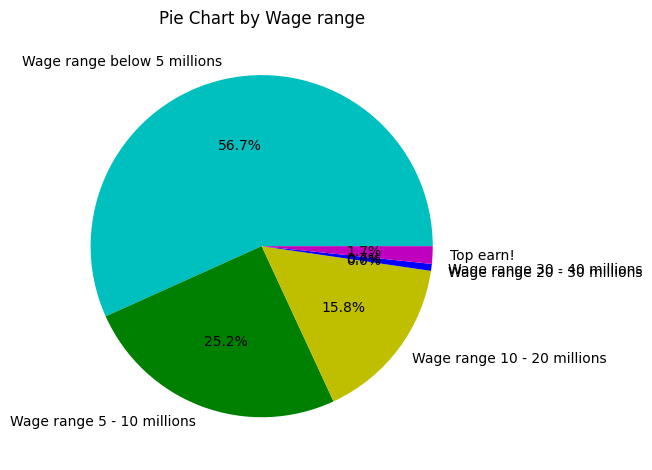

In [ ]:

bins = [0, 5000000, 10000000, 20000000, 30000000, 40000000, np.max(df['Wage'])]
labels = ["Wage range below 5 millions", "Wage range 5 - 10 millions", "Wage range 10 - 20 millions","Wage range 20 - 30 millions","Wage range 30 - 40 millions","Top earn!"]
bins_lab = pd.cut(df['Wage'], bins, labels=labels)
wage_Range_Result = pd.DataFrame({"Wage":wage, "Bins Label":bins_lab})

wage_range_groupby = wage_Range_Result.groupby('Bins Label').sum().reset_index();
print(wage_range_groupby)

labels = wage_range_groupby['Bins Label']
sizes = wage_range_groupby['Wage']
colors = ['c', 'g', 'y','r','b','m']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')

plt.title('Pie Chart by Wage range')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for double-check on why the wage range from 20 - 30 millions is zero
print(df[(df['Wage'] > 20000000) & (df['Wage'] < 30000000)])

Empty DataFrame
Columns: [Wage, Age, Club, League, Nation, Position, Apps, Caps, Continent]
Index: []


#Conslusion
Very interesting that we dont have any players have the wage between 20-30 millions.

# How much players earn per match?

           Wage  Apps  Earn Per Appearance
0 46,427,000.00   190           244,352.63
1 42,125,000.00   324           130,015.43
2 34,821,000.00   585            59,523.08
3 19,959,000.00   443            45,054.18
4 19,500,000.00   480            40,625.00


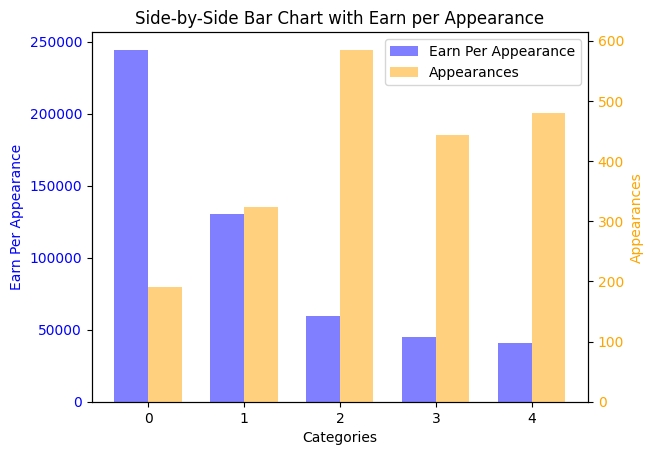

In [ ]:

bar_width = 0.35

apps = df[df['Apps'] > 1].loc[:,["Apps",'Wage']]

earn_Per_Appearance = (apps["Wage"]/ apps['Apps']);

earn_mapping_with_mean = pd.DataFrame({"Wage":apps['Wage'], "Apps":apps['Apps'], "Earn Per Appearance":earn_Per_Appearance})

first_5_items = earn_mapping_with_mean.head();

print(first_5_items)

#The length of dataset.
x = np.arange(len(first_5_items))

fig, ax1 = plt.subplots()

# Create the first y axis on the left
ax1.bar(x - bar_width/2, first_5_items['Earn Per Appearance'], bar_width, color='blue', alpha=0.5, label='Earn Per Appearance')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Earn Per Appearance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y axis on the right
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, first_5_items['Apps'], bar_width, color='orange', alpha=0.5, label='Appearances')
ax2.set_ylabel('Appearances', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x-axis tick positions and labels
ax1.set_xticks(x)

# Display the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Call the function for both sets of bars
plt.title('Side-by-Side Bar Chart with Earn per Appearance')
plt.show()


# Top 5 clubs spend the most.
Based on the dataset

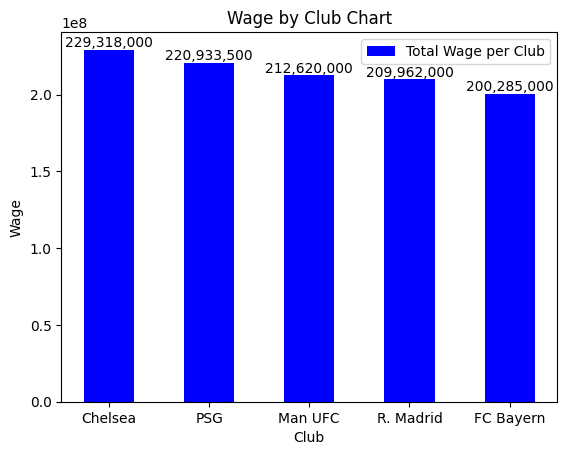

In [ ]:
club_df = df[['Club','Wage']]

club_df = club_df.groupby('Club', group_keys = True).sum().sort_values(by=['Wage'], ascending=False).reset_index();

plt.bar(club_df['Club'].head(), club_df['Wage'].head(), label = "Total Wage per Club", color = 'b', width=0.5)

plt.xlabel("Club")
plt.ylabel("Wage")
plt.title("Wage by Club Chart")
plt.legend()
for i, v in enumerate(club_df['Wage'].head().values):
    plt.text(i, v, str(f'{v:,.0f}'), color='black', ha='center', va='bottom')
plt.show()

# By Position

Position
Defender      1490
Forward        827
Goalkeeper     430
Midfilder     1160
Name: Position, dtype: int64


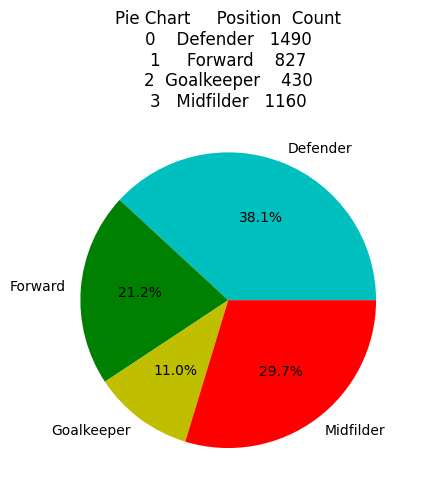

In [ ]:
df_Pos = df[['Position']]

df_Pos_Count = df_Pos.groupby(['Position'])['Position'].count().reset_index(name ='Count')

#print(df_Pos.groupby(['Position'])['Position'].count())

labels = df_Pos_Count['Position']
sizes = df_Pos_Count['Count']
colors = ['c', 'g', 'y','r']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')

plt.title('Pie Chart{}'.format(df_Pos_Count))
plt.show()

# Conslusion

This is a really normal number compared to real team. Usually in a football team, there would be 4-5 defenders, 3-4 middfileder, 2 forward and 1 goal keeper. Lead to why Defender is taking the biggest pie.

# The 3 best leagues
According to https://www.sofascore.com/football/rankings/uefa.
The three best leagues are (Seri A is not in the dataset):


1.   Premier League
2.   La Liga
3.   Bundesliga





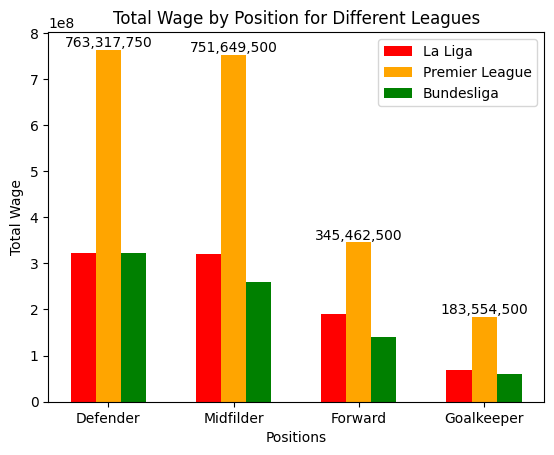

In [ ]:

def wage_by_position(league_name):
    league_data = df[df['League'] == league_name][['Wage', 'Position']]
    return league_data.groupby('Position')['Wage'].sum().sort_values(ascending=False)


liga_wage = wage_by_position('La Liga')
pl_wage = wage_by_position('Premier League')
bund_wage = wage_by_position('Bundesliga')


x = np.arange(len(liga_wage))
width = 0.2

plt.bar(x - 0.2, liga_wage.values, width, color='red', label='La Liga')
plt.bar(x, pl_wage.values, width, color='orange', label='Premier League')
plt.bar(x + 0.2, bund_wage.values, width, color='green', label='Bundesliga')

plt.xticks(x, liga_wage.index)
plt.xlabel("Positions")
plt.ylabel("Total Wage")
plt.legend()
plt.title("Total Wage by Position for Different Leagues")

#Display the otal number in string on top of the bar (Only for PL)
for i, v in enumerate(pl_wage.values):
    plt.text(i, v, str(f'{v:,.0f}'), color='black', ha='center', va='bottom')

plt.show()

# Where are the players from?

Let's see how many countries do we have.

In [ ]:
print(df['Nation'].unique())

['FRA' 'BRA' 'ARG' 'BEL' 'ESP' 'AUT' 'EGY' 'ENG' 'NOR' 'GER' 'SVN' 'SEN'
 'POL' 'CRO' 'NED' 'POR' 'ITA' 'SRB' 'ALG' 'CIV' 'DEN' 'CRC' 'KOR' 'GHA'
 'URU' 'MAR' 'GAB' 'SWE' 'SCO' 'COL' 'TUR' 'BIH' 'UKR' 'USA' 'CMR' 'CAN'
 'GUI' 'WAL' 'MLI' 'SUI' 'CTA' 'DOM' 'NIR' 'MEX' 'NGA' 'VEN' 'CZE' 'SVK'
 'JAM' 'CHI' 'ARM' 'NZL' 'ZAM' 'JPN' 'RUS' 'PAR' 'ALB' 'IRL' 'MNE' 'KOS'
 'FIN' 'GRE' 'AUS' 'BFA' 'ECU' 'ISR' 'HUN' 'IRN' 'COD' 'TOG' 'ROU' 'UZB'
 'MKD' 'GNB' 'MOZ' 'GRN' 'GEO' 'ZIM' 'TUN' 'SUR' 'LUX' 'GAM' 'EQG' 'HON'
 'MSR' 'BUL' 'ANG' 'RSA' 'BDI' 'CPV' 'CYP' 'PER' 'SLE' 'GLP' 'BEN' 'PHI'
 'GUF' 'LBY' 'COM' 'CGO' 'ISL' 'MAD' 'LTU' 'PAN' 'LVA' 'CUW' 'EST' 'IRQ'
 'GUY' 'PLE' 'THA' 'CHN' 'BER' 'SIN']


To fully visualize 114 countries would be possible, but it will hard to see because there is too many, so we come up with group them as continent.

# Players by Continent

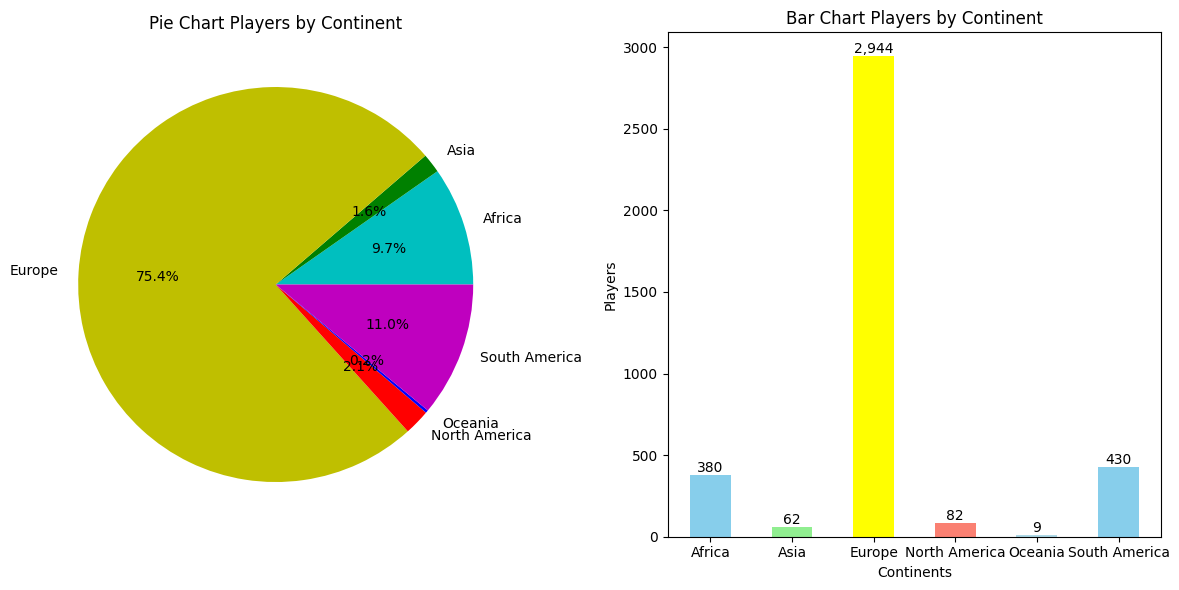

In [ ]:
# Thanks GPT for help me mapping 114 countries with continent

country_to_continent = {
    'FRA': 'Europe',
    'BRA': 'South America',
    'ARG': 'South America',
    'BEL': 'Europe',
    'ESP': 'Europe',
    'AUT': 'Europe',
    'EGY': 'Africa',
    'ENG': 'Europe',
    'NOR': 'Europe',
    'GER': 'Europe',
    'SVN': 'Europe',
    'SEN': 'Africa',
    'POL': 'Europe',
    'CRO': 'Europe',
    'NED': 'Europe',
    'POR': 'Europe',
    'ITA': 'Europe',
    'SRB': 'Europe',
    'ALG': 'Africa',
    'CIV': 'Africa',
    'DEN': 'Europe',
    'CRC': 'North America',
    'KOR': 'Asia',
    'GHA': 'Africa',
    'URU': 'South America',
    'MAR': 'Africa',
    'GAB': 'Africa',
    'SWE': 'Europe',
    'SCO': 'Europe',
    'COL': 'South America',
    'TUR': 'Europe',
    'BIH': 'Europe',
    'UKR': 'Europe',
    'USA': 'North America',
    'CMR': 'Africa',
    'CAN': 'North America',
    'GUI': 'Africa',
    'WAL': 'Europe',
    'MLI': 'Africa',
    'SUI': 'Europe',
    'CTA': 'North America',
    'DOM': 'North America',
    'NIR': 'Europe',
    'MEX': 'North America',
    'NGA': 'Africa',
    'VEN': 'South America',
    'CZE': 'Europe',
    'SVK': 'Europe',
    'JAM': 'North America',
    'CHI': 'South America',
    'ARM': 'Asia',
    'NZL': 'Oceania',
    'ZAM': 'Africa',
    'JPN': 'Asia',
    'RUS': 'Europe',
    'PAR': 'South America',
    'ALB': 'Europe',
    'IRL': 'Europe',
    'MNE': 'Europe',
    'KOS': 'Europe',
    'FIN': 'Europe',
    'GRE': 'Europe',
    'AUS': 'Oceania',
    'BFA': 'Africa',
    'ECU': 'South America',
    'ISR': 'Asia',
    'HUN': 'Europe',
    'IRN': 'Asia',
    'COD': 'Africa',
    'TOG': 'Africa',
    'ROU': 'Europe',
    'UZB': 'Asia',
    'MKD': 'Europe',
    'GNB': 'Africa',
    'MOZ': 'Africa',
    'GRN': 'North America',
    'GEO': 'Asia',
    'ZIM': 'Africa',
    'TUN': 'Africa',
    'SUR': 'South America',
    'LUX': 'Europe',
    'GAM': 'Africa',
    'EQG': 'Africa',
    'HON': 'North America',
    'MSR': 'North America',
    'BUL': 'Europe',
    'ANG': 'Africa',
    'RSA': 'Africa',
    'BDI': 'Africa',
    'CPV': 'Africa',
    'CYP': 'Europe',
    'PER': 'South America',
    'SLE': 'Africa',
    'GLP': 'North America',
    'BEN': 'Africa',
    'PHI': 'Asia',
    'GUF': 'South America',
    'LBY': 'Africa',
    'COM': 'Africa',
    'CGO': 'Africa',
    'ISL': 'Europe',
    'MAD': 'Africa',
    'LTU': 'Europe',
    'PAN': 'North America',
    'LVA': 'Europe',
    'CUW': 'North America',
    'EST': 'Europe',
    'IRQ': 'Asia',
    'GUY': 'South America',
    'PLE': 'Asia',
    'THA': 'Asia',
    'CHN': 'Asia',
    'BER': 'North America',
    'SIN': 'Asia'
}

df['Continent'] = df['Nation'].map(country_to_continent)

df_Con_Count = df.groupby(['Continent'])['Continent'].count().reset_index(name ='Players')

labels = df_Con_Count['Continent']
sizes = df_Con_Count['Players']
colors = ['c', 'g', 'y','r','b','m']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first chart
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Pie Chart Players by Continent')

# Plotting the second chart
axs[1].bar(labels, sizes, color=['skyblue', 'lightgreen', 'yellow', 'salmon', 'lightblue'], width = 0.5)
axs[1].set_title('Bar Chart Players by Continent')
axs[1].set_xlabel('Continents')
axs[1].set_ylabel('Players')

for i, v in enumerate(df_Con_Count['Players'].values):
    plt.text(i, v, str(f'{v:,.0f}'), color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Conclusion
Europe is the birthplace of Football. So undoubtedly, players from **Europe** take the most. Second favourite are from **Africa** and **South America** for their insane skills.

# Players by continent vs Wage

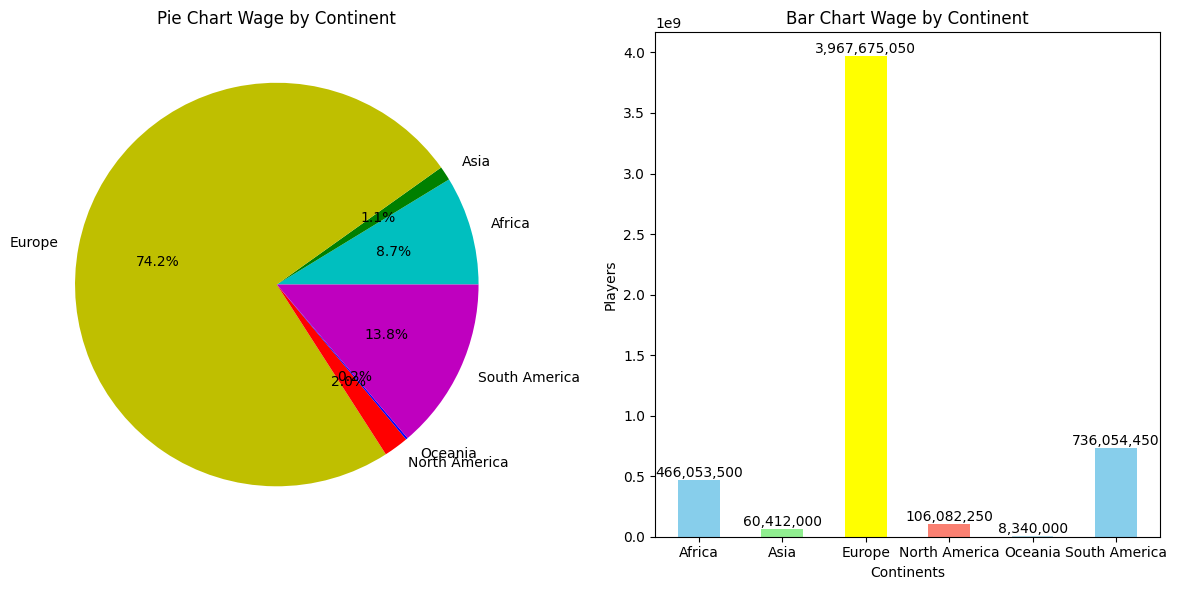

In [ ]:
continent_df = df[['Continent','Wage']]
continent_df = continent_df.groupby('Continent')['Wage'].sum().reset_index(name ='Wage')

labels = continent_df['Continent']
sizes = continent_df['Wage']
colors = ['c', 'g', 'y','r','b','m']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first chart
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Pie Chart Wage by Continent')

# Plotting the second chart
axs[1].bar(labels, sizes, color=['skyblue', 'lightgreen', 'yellow', 'salmon', 'lightblue'],width = 0.5)
axs[1].set_title('Bar Chart Wage by Continent')
axs[1].set_xlabel('Continents')
axs[1].set_ylabel('Players')

for i, v in enumerate(continent_df['Wage'].values):
    plt.text(i, v, str(f'{v:,.0f}'), color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Conclusion
As per previous charts, **Europe** players have the most of the pie, **South America** and **Africa** right after.

# Players appearence vs Wage

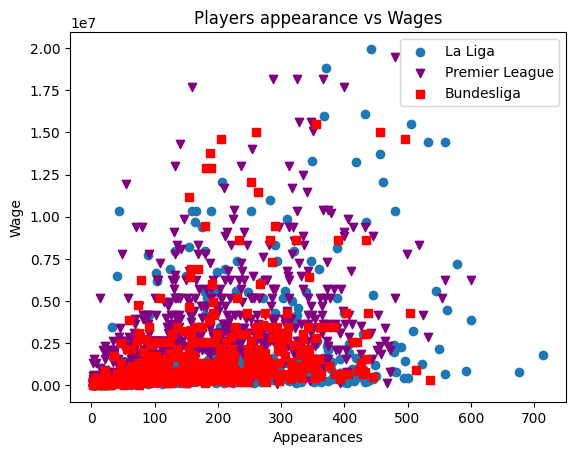

In [ ]:

def league_filter(league):
  return df[(df['Apps'] > 1) & (df['League']==league)].loc[:,["Apps",'Wage','League']]


plt.scatter(league_filter('La Liga')['Apps'], league_filter('La Liga')['Wage'],label='La Liga')
plt.scatter(league_filter('Premier League')['Apps'], league_filter('Premier League')['Wage'], marker='v', color='purple',label='Premier League')
plt.scatter(league_filter('Bundesliga')['Apps'], league_filter('Bundesliga')['Wage'], marker='s', color='r',label='Bundesliga')
plt.title('Players appearance vs Wages')
plt.xlabel('Appearances')
plt.ylabel('Wage')
plt.legend()
plt.show()

# Conclusion
The least players appear in the pitch, more likely their wage would be lower.

# Players Cap vs Wages

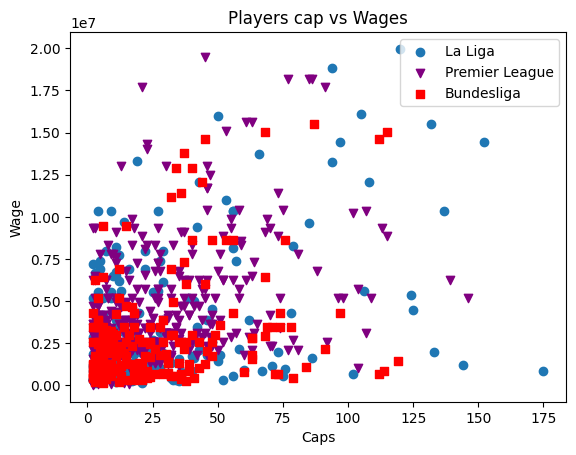

In [ ]:

def league_filter(league):
  return df[(df['Caps'] > 1) & (df['League']==league)].loc[:,["Caps",'Wage','League']]


plt.scatter(league_filter('La Liga')['Caps'], league_filter('La Liga')['Wage'],label='La Liga')
plt.scatter(league_filter('Premier League')['Caps'], league_filter('Premier League')['Wage'], marker='v', color='purple',label='Premier League')
plt.scatter(league_filter('Bundesliga')['Caps'], league_filter('Bundesliga')['Wage'], marker='s', color='r',label='Bundesliga')
plt.title('Players cap vs Wages')
plt.xlabel('Caps')
plt.ylabel('Wage')
plt.legend()
plt.show()

# Conclusion

Players that play role as Captain usually earn more than ordinary players.

# Matrix of Players

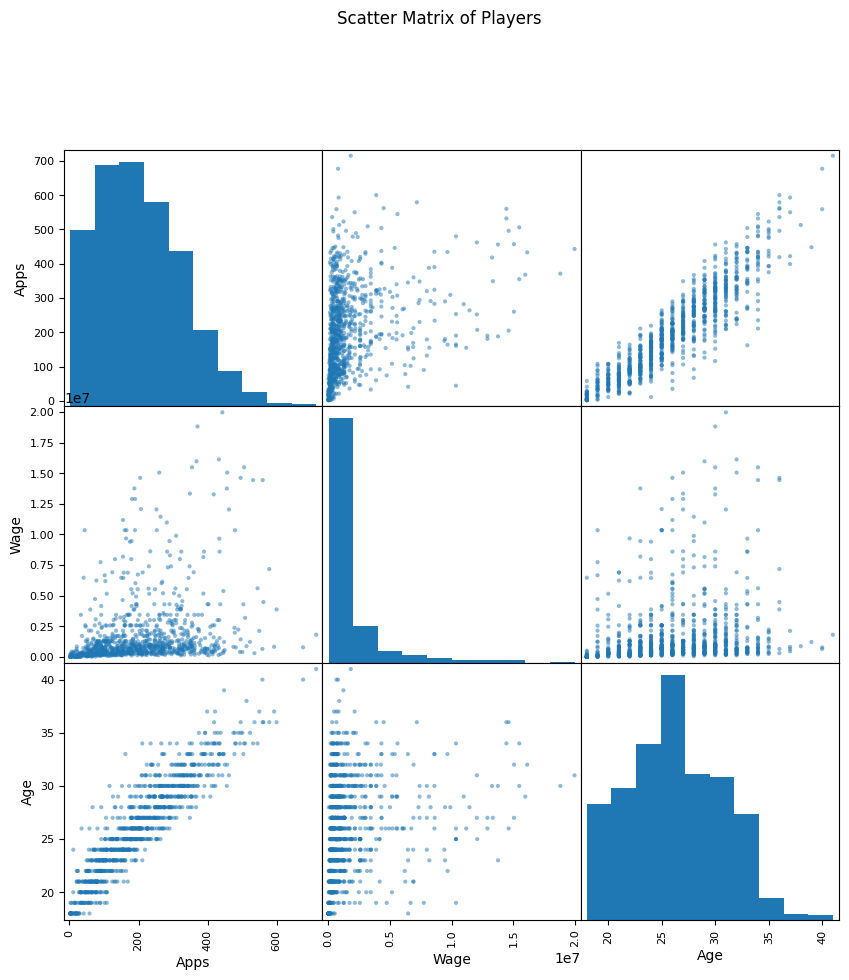

In [ ]:

matrix = df[(df['Apps'] > 1) & (df['League'].isin(['La Liga','Premier Leagua','Bundesliga']))].loc[:,["Apps",'Wage','Age']]

pd.plotting.scatter_matrix(matrix, figsize=(10, 10))
plt.suptitle('Scatter Matrix of Players', y=1.02)
plt.show()

#Matrix Conclusion


This visualize the relationships between the 'Apps', 'Wage', and 'Age' for players in the specified football leagues ('La Liga', 'Premier League', 'Bundesliga') who have played more than 1 game.

The scatter matrix provides a way for us to observes potential patterns or correlations between these variables.


